In [1]:
from wann_genetic.tools import ExperimentSeries
from util import accuracy_swarmplot

In [2]:
from scipy.stats import ttest_ind

In [3]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [4]:
data_dir = "../data/05_iris_nsga_selection"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()

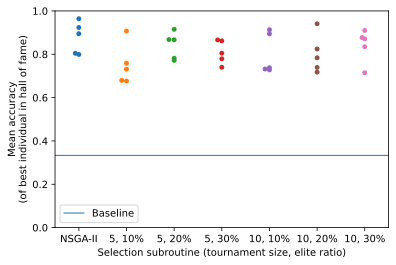

In [5]:
df['selection/_plot'] = df.aggregate(lambda row: "NSGA-II" if not row['selection/use_tournaments'] else f"{int(row['selection/tournament_size'])}, {row['selection/elite_ratio']:.0%}", axis=1)

accuracy_swarmplot(data=df, x='selection/_plot', xlabel="Selection subroutine (tournament size, elite ratio)")

In [6]:
a = df[df['selection/use_tournaments']]['MAX:accuracy.mean']
b = df[~df['selection/use_tournaments']]['MAX:accuracy.mean']
t, p = ttest_ind(a, b, equal_var=False)
print (t,p)

-1.9513932975973969 0.10166897303379493


In [7]:
print(series.hyperparam_table(tablefmt='grid'))

+----------------------------------------------------+--------------------------------------+
| Parameter                                          | Value                                |
+====================================================+======================================+
| Population size                                    | 100                                  |
+----------------------------------------------------+--------------------------------------+
| Number of generations                              | 200                                  |
+----------------------------------------------------+--------------------------------------+
| Initial population                                 | fully connected                      |
|                                                    | (edges have 5% chance of             |
|                                                    | being enabled)                       |
+----------------------------------------------------+------